# Trabalho 1 - Otimização (mestrado e doutorado em engenharia elétrica - PPGEE/UFAM)

Aluno: David Sotto Mayor Maciel Fernandes

Matrícula: Aluno Especial


# Regressão Linear

Você irá resolver o problema de regressão linear por mínimos quadrados para o dataset wine_quality_red.csv .. cujas colunas representam:

| variable | type 
| --- | --- |
| fixed_acidity | Continuous |
| volatile_acidity | Continuous |
| citric_acid | Continuous |
| residual_sugar | Continuous |
| chlorides | Continuous |
| free_sulfur_dioxide | Continuous |
| total_sulfur_dioxide | Continuous |
| density | Continuous |
| pH | Continuous |
| sulphates | Continuous |
| alcohol | Continuous |
| quality | Integer |

Queremos propor um modelo de regressão que determine a qualidade do vinho em função dos diferentes parâmetros. Para isso, iremos  a partir de um modelo de regressão linear, realizar esta atividade.

## 1 - Leitura dos dados

Inicialmente, faça a leitura dos dados do dataset. Verifique se este contém 1599 exemplos.

Após, divida o dataset em 2 grupos (treino e teste). Iremos utilizar as 1500 primeiras amostras para treinamento, e as 99 últimas para teste.

## 2 - Regressão linear monovariável

Utilizando método do gradiente com $\alpha$ fixo, apresente um modelo de regressão linear monovariável para cada feature. Ou seja, ao todo serão 11 modelos de regressão linear, um para cada... espera-se ter modelos do tipo 

$quality = f(feature)$, em que a feature é qualquer uma listada (fixed_acidity, volatile_acidity,...,alcohol) e $f$ é uma função linear. Observe ainda que quality é uma variável tipo inteira, então ao final, você deve realizar um arredondamento do resultado.

Apresente os 11 gráficos de regressão obtidos.

## 3 - validação da regressão linear monovariável

Agora, teste o seu modelo de regressão para os 99 dados de teste. Calcule o erro quadrático médio de cada modelo, apresentando os melhores e os piores obtidos.

## 4 - regressão multivariável

Agora, faça a regressão linear multivariável considerando todas as features. Você deve obter um modelo que dependa das 11 variáveis (features). Apresente o erro quadrático médio da etapa de teste.

## 5 - Equação normal

Resolva o problema de regressão pela equação normal. Apresente os códigos e comente possíveis problemas ocorridos (se aconteceram). Apresente o erro quadrático médio da etapa de teste.

## 6 - Análise

Certamente, algumas features devem ter mais significância do que outras. Considerando os resultados obtidos, faça uma análise e apresente um modelo multivariado de ordem reduzida ( tem que ser menor que 11 variáveis) que tenha resultados próximos dos obtidos na Etapa 4. Comente os resultados. Quanto menor a ordem do modelo, espera-se mais erros, porém uma redução significativa no esforço computacional.

## Considerações

Este trabalho é individual e deve ser entregue em formato jupyter notebook, neste mesmo arquivo, codificado em linguagem Julia. Coloque no início seu nome completo e número de matrícula (para alunos regulares). A data limite será estipulada no classroom.


In [9]:
# 1 - Leitura de dados

using CSV
using DataFrames

current_dir = pwd()
println("Current directory: ", current_dir)

# Combinar o diretório de trabalho atual com o nome do arquivo
file_name = "winequality-red.csv"
file_path = joinpath(current_dir, file_name)

# leitura do csv
df = CSV.read(file_path, DataFrame; delim = ',')

function clean_parse(x)
    cleaned = match(r"\d+(\.\d+)?", x)
    return cleaned !== nothing ? round(parse(Float64, cleaned.match), digits=2) : NaN
end

# tratativa de dados na coluna alcohol
df[!, "alcohol"] = map(clean_parse, df[:, "alcohol"])


println(first(df, 5))


Current directory: C:\Users\david\Optimization\27-05-2024
5×12 DataFrame
 Row │ fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH       sulphates  alcohol  quality 
     │ Float64        Float64           Float64      Float64         Float64    Float64              Float64               Float64  Float64  Float64    Float64  Int64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           7.4              0.7          0.0              1.9       76.0                 11.0                  34.0    9.978     3.51       0.56      9.4        5
   2 │           7.8              0.88         0.0              2.6       98.0                 25.0                  67.0    9.968     3.2        0.68      9.8        5
   3 │           7.8              0.76         0.04             2.3       92.0 

Intercepto ótimo (fixed acidity)(θ0): 1.7543670519174217
Inclinação ótimo (fixed acidity)(θ1): 0.44513696448666434
Intercepto ótimo (volatile acidity)(θ0): 0.005050572985679775
Inclinação ótimo (volatile acidity)(θ1): 0.007416810157729105
Intercepto ótimo (citric acid)(θ0): 5.2677930296066355
Inclinação ótimo (citric acid)(θ1): 1.3271057706454996
Intercepto ótimo (residual sugar)(θ0): 5.013962489706905
Inclinação ótimo (residual sugar)(θ1): 0.1940749889914517
Intercepto ótimo (chlorides)(θ0): 0.002223851574277396
Inclinação ótimo (chlorides)(θ1): 0.04921370956456047
Intercepto ótimo (free sulfur dioxide)(θ0): 0.0050252837839990195
Inclinação ótimo (free sulfur dioxide)(θ1): 0.07373534961986981
Intercepto ótimo (total sulfur dioxide)(θ0): 0.003035875649785151
Inclinação ótimo (total sulfur dioxide)(θ1): 0.07559719195591234
Intercepto ótimo (density)(θ0): 0.004626005077591645
Inclinação ótimo (density)(θ1): 0.009724761475363166
Intercepto ótimo (pH)(θ0): 0.5940321284942227
Inclinação óti

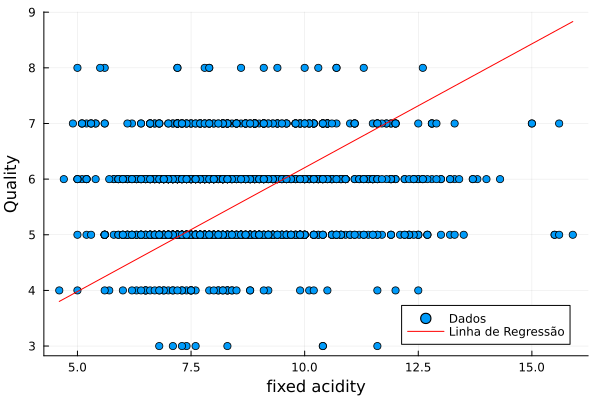

In [10]:
# 2 - Regressão Linear monovariável

using Plots

# Minimização do erro quadratico médio
function gradient_descent(x, y, α, num_iters)
    m = length(y)
    
    # Eu optei por iniciar θi nulo
    θ0 = 0.0  
    θ1 = 0.0 

    for i in 1:num_iters
        # hipótese
        predictions = θ0 .+ θ1 .* x

        # Cálculo dos erros
        errors = predictions .- y

        # Atualização θi de tal sorte que minimize a função J(θ)
        θ0 -= α * (1/m) * sum(errors)
        θ1 -= α * (1/m) * sum(errors .* x)
    end

    # Retorne os valores θi que minimizam o Erro Quadrático Médio
    return θ0, θ1
end

propriedades =  ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
                "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Dicionário para salvar os valores dos thetas
thetas = Dict{String, Any}()

# A qualidade eu posso carregar apenas uma vez, portanto fica fora do laço
quality = df[1:1500, "quality"]
for propriedade in propriedades
    prop = df[1:1500, propriedade]

    # Os valores da taxa de aprendizado por padrão setei como 0.01, mas para algumas propriedades foi
    # preciso abaixar essa taxa, então eu setei para 0.000001
    α = 0.01
    if propriedade == "volatile acidity" || propriedade == "chlorides" || 
       propriedade == "free sulfur dioxide" || propriedade == "total sulfur dioxide" || 
       propriedade == "density" || propriedade == "alcohol"
        α = 0.000001
    end
    
    # Eu fixei o número de iterações em 1000
    num_iters = 1000
    
    # Dessa forma obtêm-se o θ0, θ1 com o Erro Quadrático Médio minimizado
    θ0, θ1 = gradient_descent(prop, quality, α, num_iters)

    println("Intercepto ótimo (", propriedade, ")(θ0): ", θ0)
    println("Inclinação ótimo (", propriedade, ")(θ1): ", θ1)

    # Previsão e arredondamento
    predicted_quality = round.(θ0 .+ θ1 .* prop)
    
    thetas[propriedade] = [θ0, θ1]
end

# Plotagem de dados e a linha de regressão. 
# OBS: É preciso plotar de 1 por 1.

#1. fixed acidity
fixed_acidity = df[1:1500, "fixed acidity"]
θ0, θ1 = thetas["fixed acidity"]
scatter(fixed_acidity, quality, label="Dados", xlabel="fixed acidity", ylabel="Quality")
plot!(fixed_acidity, θ0 .+ θ1 .* fixed_acidity, label="Linha de Regressão", color=:red)

########################################################################

# # 2. volatile acidity
# volatile_acidity = df[1:1500, "volatile acidity"]
# θ0, θ1 = thetas["volatile acidity"]
# scatter(volatile_acidity, quality, label="Dados", xlabel="volatile acidity", ylabel="Quality")
# plot!(volatile_acidity, θ0 .+ θ1 .* volatile_acidity, label="Linha de Regressão", color=:red)

# ########################################################################

# # 3. citric acid
# citric_acid = df[1:1500, "citric acid"]
# θ0, θ1 = thetas["citric acid"]
# scatter(citric_acid, quality, label="Dados", xlabel="citric acid", ylabel="Quality")
# plot!(citric_acid, θ0 .+ θ1 .* citric_acid, label="Linha de Regressão", color=:red)

# ########################################################################

# # 4. residual sugar
# residual_sugar = df[1:1500, "residual sugar"]
# θ0, θ1 = thetas["residual sugar"]
# scatter(residual_sugar, quality, label="Dados", xlabel="residual sugar", ylabel="Quality")
# plot!(residual_sugar, θ0 .+ θ1 .* residual_sugar, label="Linha de Regressão", color=:red)

# ########################################################################

# # 5. chlorides
# chlorides = df[1:1500, "chlorides"]
# θ0, θ1 = thetas["chlorides"]
# scatter(chlorides, quality, label="Dados", xlabel="******", ylabel="Quality")
# plot!(chlorides, θ0 .+ θ1 .* chlorides, label="Linha de Regressão", color=:red)

# ########################################################################

# # 6. free sulfur dioxide
# free_sulfur_dioxide = df[1:1500, "free sulfur dioxide"]
# θ0, θ1 = thetas["free sulfur dioxide"]
# scatter(free_sulfur_dioxide, quality, label="Dados", xlabel="free sulfur dioxide", ylabel="Quality")
# plot!(free_sulfur_dioxide, θ0 .+ θ1 .* free_sulfur_dioxide, label="Linha de Regressão", color=:red)

# #######################################################################

# # 7. total sulfur dioxide
# total_sulfur_dioxide = df[1:1500, "total sulfur dioxide"]
# θ0, θ1 = thetas["total sulfur dioxide"]
# scatter(total_sulfur_dioxide, quality, label="Dados", xlabel="total sulfur dioxide", ylabel="Quality")
# plot!(total_sulfur_dioxide, θ0 .+ θ1 .* total_sulfur_dioxide, label="Linha de Regressão", color=:red)

# ########################################################################

# # 8. density
# density = df[1:1500, "density"]
# θ0, θ1 = thetas["density"]
# scatter(density, quality, label="Dados", xlabel="density", ylabel="Quality")
# plot!(density, θ0 .+ θ1 .* density, label="Linha de Regressão", color=:red)

# ########################################################################

# # 9. pH
# pH = df[1:1500, "pH"]
# θ0, θ1 = thetas["pH"]
# scatter(pH, quality, label="Dados", xlabel="pH", ylabel="Quality")
# plot!(pH, θ0 .+ θ1 .* pH, label="Linha de Regressão", color=:red)

# ########################################################################

# # 10. sulphates
# sulphates = df[1:1500, "sulphates"]
# θ0, θ1 = thetas["sulphates"]
# scatter(sulphates, quality, label="Dados", xlabel="sulphates", ylabel="Quality")
# plot!(sulphates, θ0 .+ θ1 .* sulphates, label="Linha de Regressão", color=:red)

# #######################################################################

# # 11. alcohol
# alcohol = df[1:1500, "alcohol"]
# θ0, θ1 = thetas["alcohol"]
# scatter(alcohol, quality, label="Dados", xlabel="alcohol", ylabel="Quality")
# plot!(alcohol, θ0 .+ θ1 .* alcohol, label="Linha de Regressão", color=:red)

In [11]:
# 3 - validação da regressão linear monovariável

using Statistics, Plots

propriedades =  ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
                "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# lista para salvar nome e valor do erro quadrático médio de cada propriedade
mse_results = []

# A qualidade eu posso carregar apenas uma vez, portanto fica fora do laço
quality_test = df[1501:end, "quality"]
for propriedade in propriedades
    prop_test = df[1501:end, propriedade]
    
    # Dicionário para salvar nome e valor do erro quadrático médio de determinada propriedade.
    mse_props = Dict{String, Any}()

    # para cada propriedade, pegue seus valores de theta associados (calculados na etapa 2).
    θ0, θ1 = thetas[propriedade]
    
    # cálculo do erro quadrático médio
    predictions_test = θ0 .+ θ1 .* prop_test
    mse = mean((predictions_test .- quality_test) .^ 2)
    
    # Adicionando dicionário
    mse_props[propriedade] = mse
    # Adicionando na lista
    push!(mse_results, mse_props)
    
    println(propriedade, " => ", "mse:", mse_props[propriedade], " | [θ0, θ1]: ", thetas[propriedade])
end

println("\n####################################################################################\n")

function get_value(dict)
    return first(values(dict))
end
sorted_mse_results = sort(mse_results, by=get_value)

println("Propriedades em ordem crescente pelo Erro Quadrático médio: \n")

counter = 1;
for mse_result in sorted_mse_results
    println(counter, ") ", keys(mse_result), ": ", values(mse_result))
    counter+= 1;
end

println("\n####################################################################################\n")

println(
"""
RESULTADOS
    
    A taxa de aprendizado padrão utilizada foi de α = 0.01. Mas, para algumas propriedades foi preciso abaixar essa taxa - pois depois de algumas iteradas os valores de theta estavam indo pra NaN, então possivelmente estava ocorrendo uma divergência -, então estas foram fixadas em α = 0.000001; as propriedades foram: "volatile acidity", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "alcohol".
    
* Relacionamento Linear Fraco com a Qualidade:
    Volatile Acidity (28.191737192852795) e Alcohol (39.58451517465408) tiveram os maiores MSE; além disso, Density (23.449732348233784), Free Sulfur Dioxide (18.260364689781543), e Total Sulfur Dioxide (11.024227904366949) também apresentaram altos MSE. Isso mostra que 5 das 6 propriedades que tiveram o α ajustado para 0.000001 não conseguiram capturar bem a variação na qualidade. 
    
* Relacionamento Linear Forte com a Qualidade:
    Citric Acid (0.46668807608307383), Residual Sugar (0.5662579942149949), pH (0.5306189678662234), e Sulphates (0.4028045156552107) apresentaram os menores MSE. Isso indica que essas propriedades têm um relacionamento mais linear e direto com a qualidade.
"""
)

fixed acidity => mse:1.3134405499331763 | [θ0, θ1]: [1.7543670519174217, 0.44513696448666434]
volatile acidity => mse:28.191737192852795 | [θ0, θ1]: [0.005050572985679775, 0.007416810157729105]
citric acid => mse:0.46668807608307383 | [θ0, θ1]: [5.2677930296066355, 1.3271057706454996]
residual sugar => mse:0.5662579942149949 | [θ0, θ1]: [5.013962489706905, 0.1940749889914517]
chlorides => mse:7.847667987059605 | [θ0, θ1]: [0.002223851574277396, 0.04921370956456047]
free sulfur dioxide => mse:18.260364689781543 | [θ0, θ1]: [0.0050252837839990195, 0.07373534961986981]
total sulfur dioxide => mse:11.024227904366949 | [θ0, θ1]: [0.003035875649785151, 0.07559719195591234]
density => mse:23.449732348233784 | [θ0, θ1]: [0.004626005077591645, 0.009724761475363166]
pH => mse:0.5306189678662234 | [θ0, θ1]: [0.5940321284942227, 1.521788313956621]
sulphates => mse:0.4028045156552107 | [θ0, θ1]: [4.075169694043863, 2.345983221241835]
alcohol => mse:39.58451517465408 | [θ0, θ1]: [0.00534563336585890

In [12]:
# 4 - regressão multivariável

# Funções 

function cost_gradient(X, y, theta)
    m = length(y)
    predictions = X * theta
    errors = predictions .- y
    gradient = (1 / m) * (X' * errors) 
    return gradient 
end

function gradient_descent(X, y, theta, alpha, num_iters)
    for iter in 1:num_iters
        gradient = cost_gradient(X, y, theta)
        theta -= alpha .* gradient
    end
    return theta
end

function feature_normalize(X::Matrix{Float64})
    mu = mean(X, dims=1)
    sigma = std(X, dims=1)
    X_norm = (X .- mu) ./ sigma
    return X_norm, mu, sigma
end

function mean_squared_error(y_true, y_pred)
    return mean((y_true .- y_pred) .^ 2)
end

######################################################################################

# Preparação de dados

x = Matrix(df[1:1500, 1:11]);
y = df[1:1500, 12];

x_norm, mu_x, std_x = feature_normalize(x);

######################################################################################

# Regressão Linear Multivariável

alpha = 0.01
num_iters = 400
theta_init = zeros(3);

m = length(y);
X = [ones(m, 1) x_norm];
theta_init = zeros(12);
theta_grad = gradient_descent(X, y, theta_init, alpha, num_iters)

######################################################################################

# Erro quadrático médio para os testes

x_test = Matrix(df[1501:end, 1:11]);
y_test = df[1501:end, 12];

x_test_norm = (x_test .- mu_x) ./ std_x;

m_test = length(y_test);
X_test = [ones(m_test, 1) x_test_norm];

predictions = X_test * theta_grad;

mse_grad = mean_squared_error(y_test, predictions)

println("Erro Quadrático Médio para os dados de testes: ", mse_grad)
println("\nResultado: Como  o Erro Quadrático Médio está próximo de zero, é possível que o modelo esteja generalizando bem.")

Erro Quadrático Médio para os dados de testes: 0.38915500675744036

Resultado: Como  o Erro Quadrático Médio está próximo de zero, é possível que o modelo esteja generalizando bem.


In [13]:
# 5 - Equação normal
using LinearAlgebra

# Funções

function normalEqn(X, y)
    theta = pinv(X'X) * X' * y
    return theta
end


function mean_squared_error(y_true, y_pred)
    return mean((y_true .- y_pred) .^ 2)
end

######################################################################################

# Cálculo da equação normal

X = Matrix(df[1:1500, 1:11]);

X = hcat(ones(m), X)
y = df[1:1500, 12];
m = size(y, 1)

theta_normal = normalEqn(X, y)

#####################################################################################

# Erro quadrático médio para os testes

X_test = Matrix(df[1501:end, 1:11])
y_test = df[1501:end, 12]

m_test = size(y_test, 1)
X_test = hcat(ones(m_test), X_test)
y_pred = X_test * theta_normal

mse = mean_squared_error(y_test, y_pred)

println("Erro Quadrático Médio (EQM) nos dados de teste: ", mse)

println("\nResultado: Como  o Erro Quadrático Médio está próximo de zero, é possível que o modelo esteja generalizando bem.")

Erro Quadrático Médio (EQM) nos dados de teste: 0.3965169375100791

Resultado: Como  o Erro Quadrático Médio está próximo de zero, é possível que o modelo esteja generalizando bem.


In [14]:
# 6 - Análise

features = ["intercept", "fixed acidity", "volatile acidity", "citric acid", 
             "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
             "density", "pH", "sulphates", "alcohol"]

# Eu vou usar apenas 5 features, excluindo o intercept

######################################################################################################################

# Gradiente

features_thetas_grad = []
counter = 1
for feature in features
    
    prop = Dict{String, Any}()
    
    prop[feature] = theta_grad[counter]
    push!(features_thetas_grad, prop)
    counter+=1
end

function get_value(dict)
    return first(values(dict))
end

sorted_features_thetas_grad = sort(features_thetas_grad, by=get_value, rev=true)
println("features para gradiente => ", sorted_features_thetas_grad[2:6]) # range de 5, como proposto

# Selecionar as features mais significativas, por meio do print acima.
selected_features_grad = ["sulphates", "citric acid", "free sulfur dioxide", "alcohol", "pH"]

# Construir o novo conjunto de dados com essas features
X_selected = df[1:1500, selected_features_grad]
X_selected = Matrix(X_selected)

# Treinar um novo modelo de regressão linear
theta_reduced = gradient_descent(X_selected, y, zeros(length(selected_features_grad)),  0.001, 400)

# Calcular o EQM para o novo modelo
predictions_reduced = X_selected * theta_reduced
mse_reduced = mean((predictions_reduced .- y).^2)

print("\n\nGRADIENTE\n")

println("\nEQM do modelo reduzido: ", mse_reduced, "\n")
println("""
Resultado:
    A diferença no EQM é significativa, indicando que o modelo reduzido perdeu precisão.
    EQM do modelo com todas as features: 0.38915500675744036
    EQM do modelo com as features com mais significância: 1.3632386636922487
    Diferença entre os EQMs: 0.9740836569348084
""")

print("\n\n")

print("######################################################################################################################")

######################################################################################################################

print("\n\n")

# Equação Normal

features_thetas_normal = []
counter = 1
for feature in features
    
    prop = Dict{String, Any}()
    
    prop[feature] = theta_normal[counter]
    push!(features_thetas_normal, prop)
    counter+=1
end

function get_value(dict)
    return first(values(dict))
end

sorted_features_thetas_normal = sort(features_thetas_normal, by=get_value, rev=true)
println("features para Eq. Normal => ", sorted_features_thetas_normal[2:6]) # range de 5, como proposto

# Selecionar as features mais significativas, por meio do print acima.
selected_features_normal = ["sulphates", "citric acid", "pH", "residual sugar", "free sulfur dioxide"]

X_selected = df[1:1500, selected_features_normal]
X_selected = Matrix(X_selected)

theta_reduced = normalEqn(X_selected, y)

print("\n\nEQUAÇÃO NORMAL\n")

# Calcular o EQM para o novo modelo
predictions_reduced = X_selected * theta_reduced
mse_reduced = mean((predictions_reduced .- y).^2)

println("\nEQM do modelo reduzido: ", mse_reduced, "\n")
println("""
Resultado:
    A diferença no EQM é relativamente pequena, é provavel que o modelo reduzido tenha precisão semelhante ao original.
    
    EQM do modelo com todas as features: 0.3965169375100791
    EQM do modelo com as features com mais significância: 0.6128907675775763
    Diferença entre os EQMs: 0.21637383006749722
""")

features para gradiente => Any[Dict{String, Any}("sulphates" => 0.18487772645846193), Dict{String, Any}("citric acid" => 0.1513968115805338), Dict{String, Any}("free sulfur dioxide" => 0.05823263305864407), Dict{String, Any}("alcohol" => 0.04679794078856699), Dict{String, Any}("pH" => 0.03428845521762529)]


GRADIENTE

EQM do modelo reduzido: 1.3632386636922487

Resultado:
    A diferença no EQM é significativa, indicando que o modelo reduzido perdeu precisão.
    EQM do modelo com todas as features: 0.38915500675744036
    EQM do modelo com as features com mais significância: 1.3632386636922487
    Diferença entre os EQMs: 0.9740836569348084



######################################################################################################################

features para Eq. Normal => Any[Dict{String, Any}("sulphates" => 1.0668112966937144), Dict{String, Any}("citric acid" => 1.0055849603679903), Dict{String, Any}("pH" => 0.07310252903539549), Dict{String, Any}("residual sugar" =